# Vintage教学准备

## 编程环境

conda版本：https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/Anaconda3-2021.11-Windows-x86_64.exe


菜鸟教程：https://www.runoob.com/mysql/mysql-tutorial.html  

## 数据场景说明

### 数据读取

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# There are two tables, which are connected by ID.
dataset_path = r'D:\固态硬盘\B站\T11 数据库高级查询\dataset'
# 用户行为
credit_record_df = pd.read_csv(os.path.join(dataset_path, 'credit_record.csv'))
# 申请人信息
application_record_df = pd.read_csv(os.path.join(dataset_path, 'application_record.csv'))

In [6]:
credit_record_df.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
(credit_record_df['STATUS'] == 'X').sum()

209230

In [4]:
application_record_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


### 数据字典

In [98]:
application_record_dict = {'ID': '客户号', 
 'CODE_GENDER': '性别', 
 'FLAG_OWN_CAR': '是否有车', 
 'FLAG_OWN_REALTY': '是否有房产', 
 'CNT_CHILDREN': '孩子个数', 
 'AMT_INCOME_TOTAL': '年收入', 
 'NAME_INCOME_TYPE': '收入类别', 
 'NAME_EDUCATION_TYPE': '教育程度', 
 'NAME_FAMILY_STATUS': '婚姻状态', 
 'NAME_HOUSING_TYPE': '居住方式', 
 'DAYS_BIRTH': '生日', # 0为当日，日期向前计算，比如-28为28天前出生
 'DAYS_EMPLOYED': '开始工作日期', # '0为当日，日期向前计算，比如-28为28天前开始工作
 'FLAG_MOBIL': '是否有手机', 
 'FLAG_WORK_PHONE': '是否有工作电话', 
 'FLAG_PHONE': '是否有电话', 
 'FLAG_EMAIL': '是否有 email', 
 'OCCUPATION_TYPE': '职业', 
 'CNT_FAM_MEMBERS': '家庭人数'
}

In [99]:
credit_record_dict = {
 'ID': '客户号', 
 'MONTHS_BALANCE': '记录月份',  # 已抽取数据月份为起点，向前倒退，0为当月，-1为前一个月，依次类推
 'STATUS': '状态',  # 0:1-29 天逾期 1:30-59 天逾期 2:60-89 天逾期 3:90-119 天逾期 4:120-149 天逾期 5:150天以上逾期或坏账、核销 C: 当月已还清 X: 当月无借款
}

### 数据类型

In [7]:
for i in credit_record_df.columns:
    print(i, credit_record_df[i].unique())

ID [5001711 5001712 5001713 ... 5150484 5150485 5150487]
MONTHS_BALANCE [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60]
STATUS ['X' '0' 'C' '1' '2' '3' '4' '5']


In [8]:
for i in application_record_df.columns:
    print(i, application_record_df[i].unique())

ID [5008804 5008805 5008806 ... 6841878 6842765 6842885]
CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['Y' 'N']
FLAG_OWN_REALTY ['Y' 'N']
CNT_CHILDREN [ 0  1  3  2  4  5 14 19  7  9 12  6]
AMT_INCOME_TOTAL [ 427500.    112500.    270000.    283500.    135000.    130500.
  157500.    405000.    211500.    360000.    126000.    315000.
  247500.    297000.    225000.    166500.    216000.    255150.
  148500.    202500.     94500.    450000.    180000.     90000.
  765000.    382500.    144000.    229500.    292500.     74250.
   40500.    337500.    193500.    267750.    139500.     67500.
  252000.    900000.    115290.    279000.     76500.    234000.
   81000.    108000.     99000.    198000.     45000.    238500.
  117000.    153000.   1350000.    445500.    495000.     85500.
  306000.    562500.    189000.    328500.    310500.    540000.
  171000.    675000.    121500.     72000.     65250.    184500.
  103500.    162000.    165150.     54000.    243000.    256500.
   33300.    697500.    

### 数据质量

- 数据安全：脱敏
- 数据主键：质量不好
- 数据统一：FLAG有的Y/N有的0/1

#### 检验重复和覆盖度

In [11]:
credit_record_df.shape, credit_record_df['ID'].unique().shape

((1048575, 3), (45985,))

In [12]:
application_record_df.shape, application_record_df['ID'].unique().shape

((438557, 18), (438510,))

In [14]:
len(set(credit_record_df['ID']).intersection(set(application_record_df['ID'])))

36457

In [15]:
# 覆盖度
36457 / 45985

0.7928020006523866

## Pandas操作

### 构造MOB

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# There are two tables, which are connected by ID.
dataset_path = r'D:\固态硬盘\B站\T11 数据库高级查询\dataset'
# 用户行为
credit_record_df = pd.read_csv(os.path.join(dataset_path, 'credit_record.csv'))
# 申请人信息
application_record_df = pd.read_csv(os.path.join(dataset_path, 'application_record.csv'))

#### 分组聚合

In [19]:
credit_record_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [22]:
credit_grouped_df = credit_record_df.groupby('ID')
credit_grouped_df

In [27]:
# 获取每个账单的最大、最小月数，从而计算距今多久了
credit_pivot_df = pd.DataFrame()
credit_pivot_df['MIN_MONTH'] = credit_grouped_df['MONTHS_BALANCE'].min()
credit_pivot_df['MAX_MONTH'] = credit_grouped_df['MONTHS_BALANCE'].max()
credit_pivot_df['PERIODS'] = credit_pivot_df['MAX_MONTH'] - credit_pivot_df['MIN_MONTH']

In [29]:
credit_pivot_df = credit_pivot_df.reset_index()

In [30]:
credit_pivot_df

,ID,MIN_MONTH,MAX_MONTH,PERIODS
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


#### 数据合并

In [31]:
# 给原始数据添加上我们计算出来的3列
credit_join_df = pd.merge(credit_record_df, credit_pivot_df, on = 'ID', how = 'left')

In [32]:
credit_join_df

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18
...,...,...,...,...,...,...
1048570,5150487,-25,C,-29,0,29
1048571,5150487,-26,C,-29,0,29
1048572,5150487,-27,C,-29,0,29
1048573,5150487,-28,C,-29,0,29


#### 窗口期过滤

In [55]:
period_stat_se = credit_join_df['PERIODS'].value_counts().sort_index() / credit_join_df.shape[0]
period_stat_se

0     0.000381
1     0.002075
2     0.003327
3     0.005108
4     0.005851
        ...   
56    0.015275
57    0.013165
58    0.013617
59    0.013390
60    0.012915
Name: PERIODS, Length: 61, dtype: float64

In [56]:
period_stat_se.head(21).sum()

0.2606327635123859

In [57]:
credit_pivot_df['PERIODS'].value_counts().sort_index() / credit_pivot_df.shape[0]

0     0.008677
1     0.023660
2     0.025291
3     0.029118
4     0.026683
        ...   
56    0.006111
57    0.005176
58    0.005263
59    0.005089
60    0.004828
Name: PERIODS, Length: 61, dtype: float64

In [58]:
(credit_pivot_df['PERIODS'].value_counts().sort_index() / credit_pivot_df.shape[0]).head(21).sum()

0.5449820593671849

In [59]:
# 窗口期太小的不参与分析
credit_filter_df = credit_join_df[credit_join_df['PERIODS'] > 20]

#### 逾期调整

只看逾期超过60天的才算逾期

In [62]:
credit_filter_df['OVERDUE'] = credit_filter_df['STATUS'].isin(['2', '3', '4', '5']).astype(int)

C:\Users\lyf\AppData\Local\Temp/ipykernel_14224/1944281633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_filter_df['OVERDUE'] = credit_filter_df['STATUS'].isin(['2', '3', '4', '5']).astype(int)


In [63]:
credit_filter_df['OVERDUE'].value_counts()

0    772745
1      2537
Name: OVERDUE, dtype: int64

In [64]:
credit_filter_df[credit_filter_df['OVERDUE']==1]

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS,OVERDUE
8911,5002126,-46,2,-55,0,55,1
8912,5002126,-47,3,-55,0,55,1
8913,5002126,-48,3,-55,0,55,1
8914,5002126,-49,2,-55,0,55,1
8915,5002126,-50,2,-55,0,55,1
...,...,...,...,...,...,...,...
1041045,5149838,-21,4,-32,0,32,1
1041046,5149838,-22,3,-32,0,32,1
1041047,5149838,-23,2,-32,0,32,1
1041048,5149838,-24,2,-32,0,32,1


In [51]:
credit_filter_df[credit_filter_df['ID']==5002126].sort_values(by='MONTHS_BALANCE', ascending=True)

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS,OVERDUE
8920,5002126,-55,0,-55,0,55,0
8919,5002126,-54,0,-55,0,55,0
8918,5002126,-53,X,-55,0,55,0
8917,5002126,-52,X,-55,0,55,0
8916,5002126,-51,1,-55,0,55,0
8915,5002126,-50,2,-55,0,55,1
8914,5002126,-49,2,-55,0,55,1
8913,5002126,-48,3,-55,0,55,1
8912,5002126,-47,3,-55,0,55,1
8911,5002126,-46,2,-55,0,55,1


#### MOB构造

In [65]:
# 计算每个账单在不同月份是第几期，所以用其当前所在月-开始月
credit_filter_df['MOB'] = credit_filter_df['MONTHS_BALANCE'] - credit_filter_df['MIN_MONTH']
credit_filter_df = credit_filter_df.sort_values(by = ['ID','MOB'])

C:\Users\lyf\AppData\Local\Temp/ipykernel_14224/3143873226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_filter_df['MOB'] = credit_filter_df['MONTHS_BALANCE'] - credit_filter_df['MIN_MONTH']


In [66]:
credit_filter_df

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS,OVERDUE,MOB
44,5001713,-21,X,-21,0,21,0,0
43,5001713,-20,X,-21,0,21,0,1
42,5001713,-19,X,-21,0,21,0,2
41,5001713,-18,X,-21,0,21,0,3
40,5001713,-17,X,-21,0,21,0,4
...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25
1048548,5150487,-3,C,-29,0,29,0,26
1048547,5150487,-2,C,-29,0,29,0,27
1048546,5150487,-1,C,-29,0,29,0,28


### 构造vintage

#### 逾期和总数

In [71]:
# 统计每个月的新放贷款数量，应该看的是MIN_MONTH，这里要去重，所以用之前的pivot表
denominator_df = credit_pivot_df.groupby(['MIN_MONTH']).agg({'ID': ['count']}) 
denominator_df.reset_index(inplace = True)
denominator_df.columns = ['MIN_MONTH', 'LENDING_COUNT']
denominator_df

,MIN_MONTH,LENDING_COUNT
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [77]:
# 统计 每个月 x 每个MOB 的贷款数量
vintage_df = credit_filter_df.groupby(['MIN_MONTH','MOB']).agg({'ID': ['count']}) 

vintage_df = vintage_df.reset_index()
vintage_df.columns = ['MIN_MONTH','MOB','OVERDUE_RATIO'] 
vintage_df['OVERDUE_RATIO'] = np.nan
vintage_df

,MIN_MONTH,MOB,OVERDUE_RATIO
0,-60,0,NaN
1,-60,1,NaN
2,-60,2,NaN
3,-60,3,NaN
4,-60,4,NaN
...,...,...,...
1655,-21,17,NaN
1656,-21,18,NaN
1657,-21,19,NaN
1658,-21,20,NaN


In [78]:
# 合并，给每个MOB都增加了一列其对应月份的贷款数量
# 但是注意
vintage_df = pd.merge(vintage_df, denominator_df, on = ['MIN_MONTH'], how = 'left') 
vintage_df = vintage_df.set_index(['MIN_MONTH', 'MOB'])
vintage_df

OVERDUE_RATIO  LENDING_COUNT
MIN_MONTH MOB                              
-60       0              NaN            415
          1              NaN            415
          2              NaN            415
          3              NaN            415
          4              NaN            415
...                      ...            ...
-21       17             NaN            858
          18             NaN            858
          19             NaN            858
          20             NaN            858
          21             NaN            858

[1660 rows x 2 columns]

#### 去重加和

In [79]:
# 1个人可能在10个月前贷款，然后过4月逾期1次，还完了后，过2个月又逾期，所以会有两笔，要去重
overdue_credit_df = credit_filter_df[credit_filter_df['OVERDUE'] == 1]

In [84]:
overdue_credit_df = overdue_credit_df.sort_values(by=['ID', 'MOB']).drop_duplicates(subset=['ID'], keep='first')
overdue_group_df = overdue_credit_df.groupby(['MIN_MONTH', 'MOB']).count()['ID']
overdue_group_df

MIN_MONTH  MOB
-60        5      1
           7      2
           9      1
           11     1
           12     1
                 ..
-21        10     1
           11     2
           12     1
           13     1
           17     1
Name: ID, Length: 365, dtype: int64

In [368]:
overdue_group_df.sum()

492

In [87]:
# 逾期率是一个累加的概念，比如10个月前的放款，看其在第10月的违约率，肯定要把前几个月的违约个数加上去的
# 但是如果一个人重复违约就不应该记录了
# 会发现由于数据量少，在unstack的时候缺失了几个mob期，这个在cumsum也补不回来，如31 40 42等，需要手动添加
unstack_overdue_df = overdue_group_df.unstack('MIN_MONTH').fillna(0)
unstack_overdue_df

MIN_MONTH,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21
MOB,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,3.0
4,0.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0
5,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
7,2.0,0.0,2.0,2.0,3.0,0.0,3.0,1.0,0.0,2.0,...,3.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [88]:
for i in range(0, 60):
    if i not in unstack_overdue_df.index:
        unstack_overdue_df.loc[i, :] = 0

In [89]:
unstack_overdue_df

MIN_MONTH,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21
MOB,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,3.0
4,0.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0
5,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
7,2.0,0.0,2.0,2.0,3.0,0.0,3.0,1.0,0.0,2.0,...,3.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [95]:
cumsum_overdue_df = unstack_overdue_df.sort_index().cumsum().stack()

cumsum_overdue_df = cumsum_overdue_df.swaplevel()
cumsum_overdue_df

MIN_MONTH  MOB
-60        0       0.0
-59        0       0.0
-58        0       0.0
-57        0       0.0
-56        0       0.0
                  ... 
-25        59     15.0
-24        59      6.0
-23        59      7.0
-22        59     10.0
-21        59     15.0
Length: 2400, dtype: float64

In [96]:
vintage_df['OVERDUE_RATIO'] = (cumsum_overdue_df / vintage_df['LENDING_COUNT'])

In [97]:
vintage_df.reset_index()

,MIN_MONTH,MOB,OVERDUE_RATIO,LENDING_COUNT
0,-60,0,0.000000,415
1,-60,1,0.000000,415
2,-60,2,0.000000,415
3,-60,3,0.000000,415
4,-60,4,0.000000,415
...,...,...,...,...
1655,-21,17,0.017483,858
1656,-21,18,0.017483,858
1657,-21,19,0.017483,858
1658,-21,20,0.017483,858


#### 透视表

In [98]:
vintage_wide_df = vintage_df.reset_index().pivot(index = 'MIN_MONTH',
                             columns = 'MOB',
                             values = 'OVERDUE_RATIO')
vintage_wide_df

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
MIN_MONTH,,,,,,,,,,,,,,,,,,,,,
-60,0.00000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,NaN
-59,0.00000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.00000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.00000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
-55,0.00000,0.000000,0.002058,0.006173,0.012346,0.016461,0.022634,0.022634,0.022634,0.024691,...,0.045267,0.045267,0.045267,0.045267,0.045267,NaN,NaN,NaN,NaN,NaN
-54,0.00000,0.000000,0.000000,0.002137,0.004274,0.004274,0.006410,0.012821,0.012821,0.017094,...,0.032051,0.032051,0.032051,0.032051,NaN,NaN,NaN,NaN,NaN,NaN
-53,0.00000,0.002028,0.002028,0.002028,0.004057,0.004057,0.008114,0.010142,0.010142,0.012170,...,0.028398,0.028398,0.028398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-52,0.00000,0.000000,0.007233,0.009042,0.009042,0.009042,0.012658,0.012658,0.014467,0.016275,...,0.023508,0.023508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 画图展示

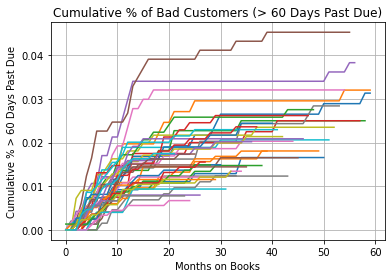

In [99]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage_wide_df.T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()


# SQL操作

## 数据库操作

### 建库建表

#### 建库连接

In [102]:
# 导入pymysql模块
import pymysql

In [103]:
# 连接database
conn = pymysql.connect(host='127.0.0.1', port=3306, user='root', password='biliafan'
                       ,database='vintage', charset='utf8')
# 得到一个可以执行SQL语句并且将结果作为字典返回的游标
cursor = conn.cursor(cursor=pymysql.cursors.DictCursor)

#### 表外键说明

这里不适用，表外键也不是必须

#### 数据脱敏说明

你发现这里面只有ID，用户的四元组信息没有透露，甚至出生日期都没有说明，需要自己反推

#### 建用户表

我们是事后建表导入，一般来说如果数据从业务库来的，ID这种唯一的类型不可能重复

这个记录表是上游每天加工而成的，会每天刷新它的贷款时间和违约情况（举例，原始表情况，用Pandas举例）

In [104]:
# 定义要执行的SQL语句
# 这里没有严格卡死表的字段类型，不考虑空间利用情况
sql = """
CREATE TABLE USER (
ID INT,
CODE_GENDER CHAR(1), 
FLAG_OWN_CAR CHAR(1),
FLAG_OWN_REALTY CHAR(1),
CNT_CHILDREN INT,
AMT_INCOME_TOTAL FLOAT,
NAME_INCOME_TYPE VARCHAR(64),
NAME_EDUCATION_TYPE VARCHAR(64),
NAME_FAMILY_STATUS VARCHAR(64),
NAME_HOUSING_TYPE VARCHAR(64),
DAYS_BIRTH INT,
DAYS_EMPLOYED INT,
FLAG_MOBIL INT,
FLAG_WORK_PHONE INT,
FLAG_PHONE INT,
FLAG_EMAIL INT,
OCCUPATION_TYPE VARCHAR(64),
CNT_FAM_MEMBERS INT
)ENGINE=innodb DEFAULT CHARSET=utf8;
"""

In [105]:
# 执行SQL语句
cursor.execute(sql)

0

#### 建记录表

In [106]:
# 定义要执行的SQL语句
sql = """
CREATE TABLE CREDIT(
ID INT, 
MONTHS_BALANCE INT NOT NULL,
STATUS VARCHAR(10) NOT NULL
)ENGINE=innodb DEFAULT CHARSET=utf8;
"""

In [107]:
# 执行SQL语句
cursor.execute(sql)

0

### 数据入库

#### 用户信息入库

In [108]:
user_column_list = ['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']

In [109]:
user_insert_sql = "INSERT INTO USER(ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"

In [110]:
# 有重复的ID
application_record_df = application_record_df.drop_duplicates(subset=['ID'])

In [111]:
# 调整顺序的必要性
databse_user_df = application_record_df.loc[:, user_column_list]
databse_user_df = databse_user_df.where(databse_user_df.notnull(), None)

In [112]:
try:
    # 批量执行多条插入SQL语句
    cursor.executemany(user_insert_sql, databse_user_df.values.tolist())
    # 提交事务
    conn.commit()
except Exception as e:
    print(e)
    # 有异常，回滚事务
    conn.rollback()

#### 记录信息入库

In [113]:
credit_column_list = ['ID', 'MONTHS_BALANCE', 'STATUS']

In [114]:
credit_insert_sql = "INSERT INTO CREDIT(ID, MONTHS_BALANCE, STATUS) VALUES (%s, %s, %s);"

In [115]:
# 调整顺序的必要性
databse_credit_df = credit_record_df.loc[:, credit_column_list]
databse_credit_df = databse_credit_df.where(databse_credit_df.notnull(), None)

In [116]:
try:
    # 批量执行多条插入SQL语句
    cursor.executemany(credit_insert_sql, databse_credit_df.values.tolist())
    # 提交事务
    conn.commit()
except Exception as e:
    print(e)
    # 有异常，回滚事务
    conn.rollback()

## 获取全部数据

假设数据量太大，我们不能直接取出来到Pandas当中

In [117]:
cursor.execute('select * from credit')
df = pd.DataFrame(cursor.fetchall())
df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


## 分组聚合- GROUP BY

### 取最大最小

In [118]:
sql = '''
SELECT
    ID
    ,MIN(MONTHS_BALANCE) AS MIN_MONTH
    ,MAX(MONTHS_BALANCE) AS MAX_MONTH
FROM 
    credit 
GROUP BY 
    ID
'''

In [119]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,ID,MIN_MONTH,MAX_MONTH
0,5001711,-3,0
1,5001712,-18,0
2,5001713,-21,0
3,5001714,-14,0
4,5001715,-59,0
...,...,...,...
45980,5150482,-28,-11
45981,5150483,-17,0
45982,5150484,-12,0
45983,5150485,-1,0


### 计算区间 - 语句嵌套

In [124]:
sql = '''
SELECT
    *
    ,MAX_MONTH - MIN_MONTH AS PERIODS
FROM
    (SELECT
        ID
        ,MIN(MONTHS_BALANCE) AS MIN_MONTH
        ,MAX(MONTHS_BALANCE) AS MAX_MONTH
    FROM 
        credit 
    GROUP BY 
        ID) AS TABLE_A
'''

In [125]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,ID,MIN_MONTH,MAX_MONTH,PERIODS
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


### 对比Pandas

In [126]:
credit_pivot_df

,ID,MIN_MONTH,MAX_MONTH,PERIODS
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


### 保存临时表 - CREATE AS

In [127]:
sql = '''
-- 该表的目的是生成ID粒度的统计表
CREATE TABLE IF NOT EXISTS credit_pivot AS
SELECT
    *
    ,MAX_MONTH - MIN_MONTH AS PERIODS
FROM
    (SELECT
        ID
        ,MIN(MONTHS_BALANCE) AS MIN_MONTH
        ,MAX(MONTHS_BALANCE) AS MAX_MONTH
    FROM 
        credit 
    GROUP BY  
        ID) AS TABLE_A
'''

In [128]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

""


## 合并表 - LEFT JOIN

看以谁去匹配谁，业务上习惯上把需要匹配上数据的表放在左边

### 直接合并

In [132]:
sql = '''
SELECT
    *
FROM 
    credit AS TABLE_LEFT
LEFT JOIN
    credit_pivot AS TABLE_RIGHT 
ON TABLE_LEFT.ID = TABLE_RIGHT.ID
'''

In [133]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,ID,MONTHS_BALANCE,STATUS,TABLE_RIGHT.ID,MIN_MONTH,MAX_MONTH,PERIODS
0,5001711,0,X,5001711,-3,0,3
1,5001711,-1,0,5001711,-3,0,3
2,5001711,-2,0,5001711,-3,0,3
3,5001711,-3,0,5001711,-3,0,3
4,5001712,0,C,5001712,-18,0,18
...,...,...,...,...,...,...,...
1048570,5150422,-21,C,5150422,-25,0,25
1048571,5150422,-22,C,5150422,-25,0,25
1048572,5150422,-23,C,5150422,-25,0,25
1048573,5150422,-24,C,5150422,-25,0,25


### 对比Pandas

In [134]:
credit_join_df

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18
...,...,...,...,...,...,...
1048570,5150487,-25,C,-29,0,29
1048571,5150487,-26,C,-29,0,29
1048572,5150487,-27,C,-29,0,29
1048573,5150487,-28,C,-29,0,29


### SQL注释

In [446]:
sql = '''
-- 该表的目的是给每条记录增加其最早放款时间、和放款最后结束时间，以及总时间，单位：月
SELECT
    *
FROM 
    credit AS TABLE_LEFT -- 原记录表
LEFT JOIN
    credit_pivot AS TABLE_RIGHT -- 聚合后含时间的表
ON TABLE_LEFT.ID = TABLE_RIGHT.ID
'''

In [447]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,ID,MONTHS_BALANCE,STATUS,TABLE_RIGHT.ID,MIN_MONTH,MAX_MONTH,PERIODS
0,5001711,0,X,5001711,-3,0,3
1,5001711,-1,0,5001711,-3,0,3
2,5001711,-2,0,5001711,-3,0,3
3,5001711,-3,0,5001711,-3,0,3
4,5001712,0,C,5001712,-18,0,18
...,...,...,...,...,...,...,...
1048570,5150487,-25,C,5150487,-29,0,29
1048571,5150487,-26,C,5150487,-29,0,29
1048572,5150487,-27,C,5150487,-29,0,29
1048573,5150487,-28,C,5150487,-29,0,29


## 保存合并表

这里我们要保留过滤前的数据，但是在SQL中没有内存概念，所以我们得先把之前的表保存

### 保存和换行

In [135]:
sql = '''
-- 该表的目的是给每条记录增加其最早放款时间、和放款最后结束时间，以及总时间，单位：月
CREATE TABLE IF NOT EXISTS credit_join AS
SELECT
    *
FROM 
    credit AS TABLE_LEFT -- 原记录表
LEFT JOIN
    credit_pivot AS TABLE_RIGHT -- 聚合后含时间的表
ON TABLE_LEFT.ID = TABLE_RIGHT.ID
'''

### 重复ID的问题

查询时不会报错，但是形成新表的时候就有问题

In [136]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

OperationalError: (1060, "Duplicate column name 'ID'")

### SQL的通配符

\* rn+ 等等，这里不列举

In [139]:
sql = '''
-- 该表的目的是给每条记录增加其最早放款时间、和放款最后结束时间，以及总时间，单位：月
CREATE TABLE IF NOT EXISTS credit_join AS 
SELECT
    TABLE_LEFT.*
    ,TABLE_RIGHT.MIN_MONTH
    ,TABLE_RIGHT.MAX_MONTH
    ,TABLE_RIGHT.PERIODS
FROM 
    credit AS TABLE_LEFT -- 原记录表
LEFT JOIN
    credit_pivot AS TABLE_RIGHT -- 聚合后含时间的表
ON TABLE_LEFT.ID = TABLE_RIGHT.ID
'''

In [140]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

""


### 删除表 - DROP EXISTS

不要和原语句写在一起，这里执行只能一句一句来

In [514]:
sql = '''
DROP TABLE IF EXISTS credit_join
'''

In [515]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

""


## 过滤表准备

### 窗口期过滤 -WHERE

In [141]:
sql = '''
SELECT
    *
FROM 
    credit_join 
WHERE PERIODS > 20
'''

In [142]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS
0,5001713,0,X,-21,0,21
1,5001713,-1,X,-21,0,21
2,5001713,-2,X,-21,0,21
3,5001713,-3,X,-21,0,21
4,5001713,-4,X,-21,0,21
...,...,...,...,...,...,...
775277,5150422,-21,C,-25,0,25
775278,5150422,-22,C,-25,0,25
775279,5150422,-23,C,-25,0,25
775280,5150422,-24,C,-25,0,25


### 逾期字段生成 -- CASE WHEN

In [143]:
sql = '''
SELECT
    *
    ,CASE WHEN STATUS IN ('2', '3', '4', '5') THEN 1
        ELSE 0 END AS OVERDUE
FROM 
    credit_join 
WHERE PERIODS > 20
'''

In [144]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS,OVERDUE
0,5001713,0,X,-21,0,21,0
1,5001713,-1,X,-21,0,21,0
2,5001713,-2,X,-21,0,21,0
3,5001713,-3,X,-21,0,21,0
4,5001713,-4,X,-21,0,21,0
...,...,...,...,...,...,...,...
775277,5150422,-21,C,-25,0,25,0
775278,5150422,-22,C,-25,0,25,0
775279,5150422,-23,C,-25,0,25,0
775280,5150422,-24,C,-25,0,25,0


In [145]:
df[df['OVERDUE']==1]

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS,OVERDUE
7336,5002126,-46,2,-55,0,55,1
7337,5002126,-47,3,-55,0,55,1
7338,5002126,-48,3,-55,0,55,1
7339,5002126,-49,2,-55,0,55,1
7340,5002126,-50,2,-55,0,55,1
...,...,...,...,...,...,...,...
774873,5149838,-21,4,-32,0,32,1
774874,5149838,-22,3,-32,0,32,1
774875,5149838,-23,2,-32,0,32,1
774876,5149838,-24,2,-32,0,32,1


### MOB字段生成和表保存-ORDER BY

In [146]:
sql = '''
CREATE TABLE IF NOT EXISTS credit_filter AS 
SELECT
    *
    ,CASE WHEN STATUS IN ('2', '3', '4', '5') THEN 1
        ELSE 0 END AS OVERDUE
    ,MONTHS_BALANCE - MIN_MONTH AS MOB
FROM 
    credit_join 
WHERE PERIODS > 20
ORDER BY ID ASC, MOB ASC
'''

In [147]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

""


## vintage构造

### 统计 每个月 x 每个MOB 的贷款数量

In [148]:
# 只是借group by 生成索引
sql = '''
SELECT
    B.*
    ,C.LENDING_COUNT
FROM 
    (SELECT 
        MIN_MONTH
        ,MOB
    FROM 
        credit_filter
    GROUP BY 
        MIN_MONTH, MOB) AS B
LEFT JOIN 
    (SELECT
        MIN_MONTH
        ,COUNT(*) AS LENDING_COUNT
    FROM 
        credit_pivot
    GROUP BY 
        MIN_MONTH) AS C
ON B.MIN_MONTH = C.MIN_MONTH
'''

In [149]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,MIN_MONTH,MOB,LENDING_COUNT
0,-21,0,858
1,-21,1,858
2,-21,2,858
3,-21,3,858
4,-21,4,858
...,...,...,...
1655,-44,40,591
1656,-44,41,591
1657,-44,42,591
1658,-44,43,591


#### 保存统计表

In [150]:
# 只是借group by 生成索引
sql = '''
CREATE TABLE IF NOT EXISTS mob_count AS 
SELECT
    B.*
    ,C.LENDING_COUNT
FROM 
    (SELECT 
        MIN_MONTH
        ,MOB
    FROM 
        credit_filter
    GROUP BY 
        MIN_MONTH, MOB) AS B
LEFT JOIN 
    (SELECT
        MIN_MONTH
        ,COUNT(*) AS LENDING_COUNT
    FROM 
        credit_pivot
    GROUP BY 
        MIN_MONTH) AS C
ON B.MIN_MONTH = C.MIN_MONTH
'''

In [151]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

""


### 统计 每个月 x 每个MOB的逾期个数

#### 生成行数

In [152]:
sql = '''
SELECT 
    *
    ,ROW_NUMBER() OVER(PARTITION BY ID ORDER BY MOB ASC) AS rn
FROM credit_filter
WHERE OVERDUE = 1
'''

In [153]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS,OVERDUE,MOB,rn
0,5002126,-50,2,-55,0,55,1,5,1
1,5002126,-49,2,-55,0,55,1,6,2
2,5002126,-48,3,-55,0,55,1,7,3
3,5002126,-47,3,-55,0,55,1,8,4
4,5002126,-46,2,-55,0,55,1,9,5
...,...,...,...,...,...,...,...,...,...
2532,5149838,-17,5,-32,0,32,1,15,8
2533,5149838,-16,5,-32,0,32,1,16,9
2534,5149838,-15,5,-32,0,32,1,17,10
2535,5149838,-14,5,-32,0,32,1,18,11


In [154]:
df.sort_values(by=['ID', 'MOB']).head(30)

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS,OVERDUE,MOB,rn
0,5002126,-50,2,-55,0,55,1,5,1
1,5002126,-49,2,-55,0,55,1,6,2
2,5002126,-48,3,-55,0,55,1,7,3
3,5002126,-47,3,-55,0,55,1,8,4
4,5002126,-46,2,-55,0,55,1,9,5
5,5002255,-4,2,-37,0,37,1,33,1
6,5002283,-48,2,-60,0,60,1,12,1
7,5002303,-10,2,-21,0,21,1,11,1
8,5002303,-9,2,-21,0,21,1,12,2
9,5002380,-5,2,-56,0,56,1,51,1


#### 选择第1行

In [155]:
sql = '''
SELECT
    *
FROM
    (SELECT 
        *
        ,ROW_NUMBER() OVER(PARTITION BY ID ORDER BY MOB ASC) AS rn
    FROM  credit_filter
    WHERE OVERDUE = 1) AS T
WHERE T.rn = 1
'''

In [156]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,ID,MONTHS_BALANCE,STATUS,MIN_MONTH,MAX_MONTH,PERIODS,OVERDUE,MOB,rn
0,5002126,-50,2,-55,0,55,1,5,1
1,5002255,-4,2,-37,0,37,1,33,1
2,5002283,-48,2,-60,0,60,1,12,1
3,5002303,-10,2,-21,0,21,1,11,1
4,5002380,-5,2,-56,0,56,1,51,1
...,...,...,...,...,...,...,...,...,...
487,5149729,-18,2,-21,0,21,1,3,1
488,5149730,-31,2,-43,-21,22,1,12,1
489,5149834,-15,2,-23,0,23,1,8,1
490,5149838,-24,2,-32,0,32,1,8,1


#### 聚合统计

In [157]:
sql = '''
SELECT
    MIN_MONTH
    ,MOB
    ,COUNT(ID) AS CNT
FROM
    (SELECT 
        *
        ,ROW_NUMBER() OVER(PARTITION BY ID ORDER BY MOB ASC) AS rn
    FROM  credit_filter
    WHERE OVERDUE = 1) AS T
WHERE T.rn = 1
GROUP BY MIN_MONTH, MOB
'''

In [158]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

,MIN_MONTH,MOB,CNT
0,-55,5,2
1,-37,33,1
2,-60,12,1
3,-21,11,2
4,-56,51,1
...,...,...,...
360,-28,5,1
361,-59,18,1
362,-43,12,1
363,-23,8,1


#### 保存统计表

In [159]:
sql = '''
CREATE TABLE IF NOT EXISTS overdue_group AS 
SELECT
    MIN_MONTH
    ,MOB
    ,COUNT(ID) AS CNT
FROM
    (SELECT 
        *
        ,ROW_NUMBER() OVER(PARTITION BY ID ORDER BY MOB ASC) AS rn
    FROM  credit_filter
    WHERE OVERDUE = 1) AS T
WHERE T.rn = 1
GROUP BY MIN_MONTH, MOB
'''

In [160]:
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df

""


## Python分析

### 数据读取

In [163]:
cursor.execute('select * from mob_count')
denominator_df = pd.DataFrame(cursor.fetchall())
denominator_df

,MIN_MONTH,MOB,LENDING_COUNT
0,-21,0,858
1,-21,1,858
2,-21,2,858
3,-21,3,858
4,-21,4,858
...,...,...,...
1655,-44,40,591
1656,-44,41,591
1657,-44,42,591
1658,-44,43,591


In [164]:
cursor.execute('select * from overdue_group')
overdue_group_df = pd.DataFrame(cursor.fetchall())
overdue_group_df

,MIN_MONTH,MOB,CNT
0,-55,5,2
1,-37,33,1
2,-60,12,1
3,-21,11,2
4,-56,51,1
...,...,...,...
360,-28,5,1
361,-59,18,1
362,-43,12,1
363,-23,8,1


### 还原数据

In [165]:
vintage_df = denominator_df.set_index(['MIN_MONTH', 'MOB'])
vintage_df['OVERDUE_RATIO'] = np.nan
vintage_df

LENDING_COUNT  OVERDUE_RATIO
MIN_MONTH MOB                              
-21       0              858            NaN
          1              858            NaN
          2              858            NaN
          3              858            NaN
          4              858            NaN
...                      ...            ...
-44       40             591            NaN
          41             591            NaN
          42             591            NaN
          43             591            NaN
          44             591            NaN

[1660 rows x 2 columns]

In [166]:
overdue_group_df = overdue_group_df.set_index(['MIN_MONTH', 'MOB'])['CNT']
overdue_group_df

MIN_MONTH  MOB
-55        5      2
-37        33     1
-60        12     1
-21        11     2
-56        51     1
                 ..
-28        5      1
-59        18     1
-43        12     1
-23        8      1
-53        48     1
Name: CNT, Length: 365, dtype: int64

In [167]:
overdue_group_df.sum()

492

### 分析画图

In [168]:
unstack_overdue_df = overdue_group_df.unstack('MIN_MONTH').fillna(0)
for i in range(0, 60):
    if i not in unstack_overdue_df.index:
        unstack_overdue_df.loc[i, :] = 0

In [170]:
unstack_overdue_df.tail(10)

MIN_MONTH,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21
MOB,,,,,,,,,,,,,,,,,,,,,
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
cumsum_overdue_df = unstack_overdue_df.sort_index().cumsum().stack()
cumsum_overdue_df = cumsum_overdue_df.swaplevel()

vintage_df['OVERDUE_RATIO'] = (cumsum_overdue_df / vintage_df['LENDING_COUNT'])

In [172]:
vintage_df.reset_index()

,MIN_MONTH,MOB,LENDING_COUNT,OVERDUE_RATIO
0,-21,0,858,0.000000
1,-21,1,858,0.000000
2,-21,2,858,0.000000
3,-21,3,858,0.003497
4,-21,4,858,0.004662
...,...,...,...,...
1655,-44,40,591,0.020305
1656,-44,41,591,0.020305
1657,-44,42,591,0.020305
1658,-44,43,591,0.020305


In [173]:
vintage_wide_df = vintage_df.reset_index().pivot(index = 'MIN_MONTH',
                             columns = 'MOB',
                             values = 'OVERDUE_RATIO')
vintage_wide_df

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
MIN_MONTH,,,,,,,,,,,,,,,,,,,,,
-60,0.00000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,NaN
-59,0.00000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.00000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.00000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
-55,0.00000,0.000000,0.002058,0.006173,0.012346,0.016461,0.022634,0.022634,0.022634,0.024691,...,0.045267,0.045267,0.045267,0.045267,0.045267,NaN,NaN,NaN,NaN,NaN
-54,0.00000,0.000000,0.000000,0.002137,0.004274,0.004274,0.006410,0.012821,0.012821,0.017094,...,0.032051,0.032051,0.032051,0.032051,NaN,NaN,NaN,NaN,NaN,NaN
-53,0.00000,0.002028,0.002028,0.002028,0.004057,0.004057,0.008114,0.010142,0.010142,0.012170,...,0.028398,0.028398,0.028398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-52,0.00000,0.000000,0.007233,0.009042,0.009042,0.009042,0.012658,0.012658,0.014467,0.016275,...,0.023508,0.023508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 画图展示

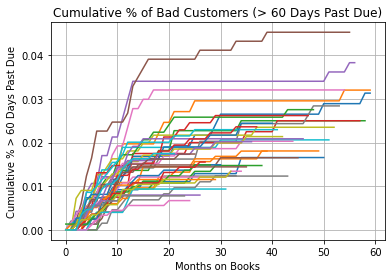

In [174]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage_wide_df.T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()